In [ ]:
import warnings
warnings.filterwarnings("ignore")
import datetime

In [ ]:
from google.colab import drive
import os

def mountGoogleDrive(myFolder):
    drive.mount("/content/drive", force_remount=True)
    dest_folder = "/content/drive/My Drive/" + myFolder
    os.chdir(dest_folder)

    curr_path = os.getcwd()

myFolder = "Colab Notebooks/datavis/proj"
mountGoogleDrive(myFolder)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
cols = [
    "Location_ID", "Medium", "Activity_Start_Date", "Characteristic_Name", "Result_Text",
]
df = pd.read_csv("niobara.csv", low_memory=False, usecols=cols)

In [ ]:
df = df[df.Medium == "Water"]
df = df.drop("Medium", axis=1)
df = df.dropna()

In [ ]:
df['Characteristic_Name'].value_counts()

Characteristic_Name
Specific conductance                                         2232
Temperature, water                                           2109
pH                                                           1994
Salinity                                                     1992
Dissolved oxygen (DO)                                        1963
Turbidity                                                    1901
Alkalinity, Total (total hydroxide+carbonate+bicarbonate)    1464
Stream condition (text)                                      1442
Escherichia coli                                             1014
Dissolved oxygen saturation                                   925
Phosphorus, orthophosphate as PO4                             772
Nitrogen, Nitrate (NO3) as N                                  451
Flow                                                          352
Nitrogen, ammonia as N                                        349
Nitrogen, ammonia (NH3) as NH3                          

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
col = [
    'red', 'red', 'red', "grey", 'red', "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey", "grey",
]

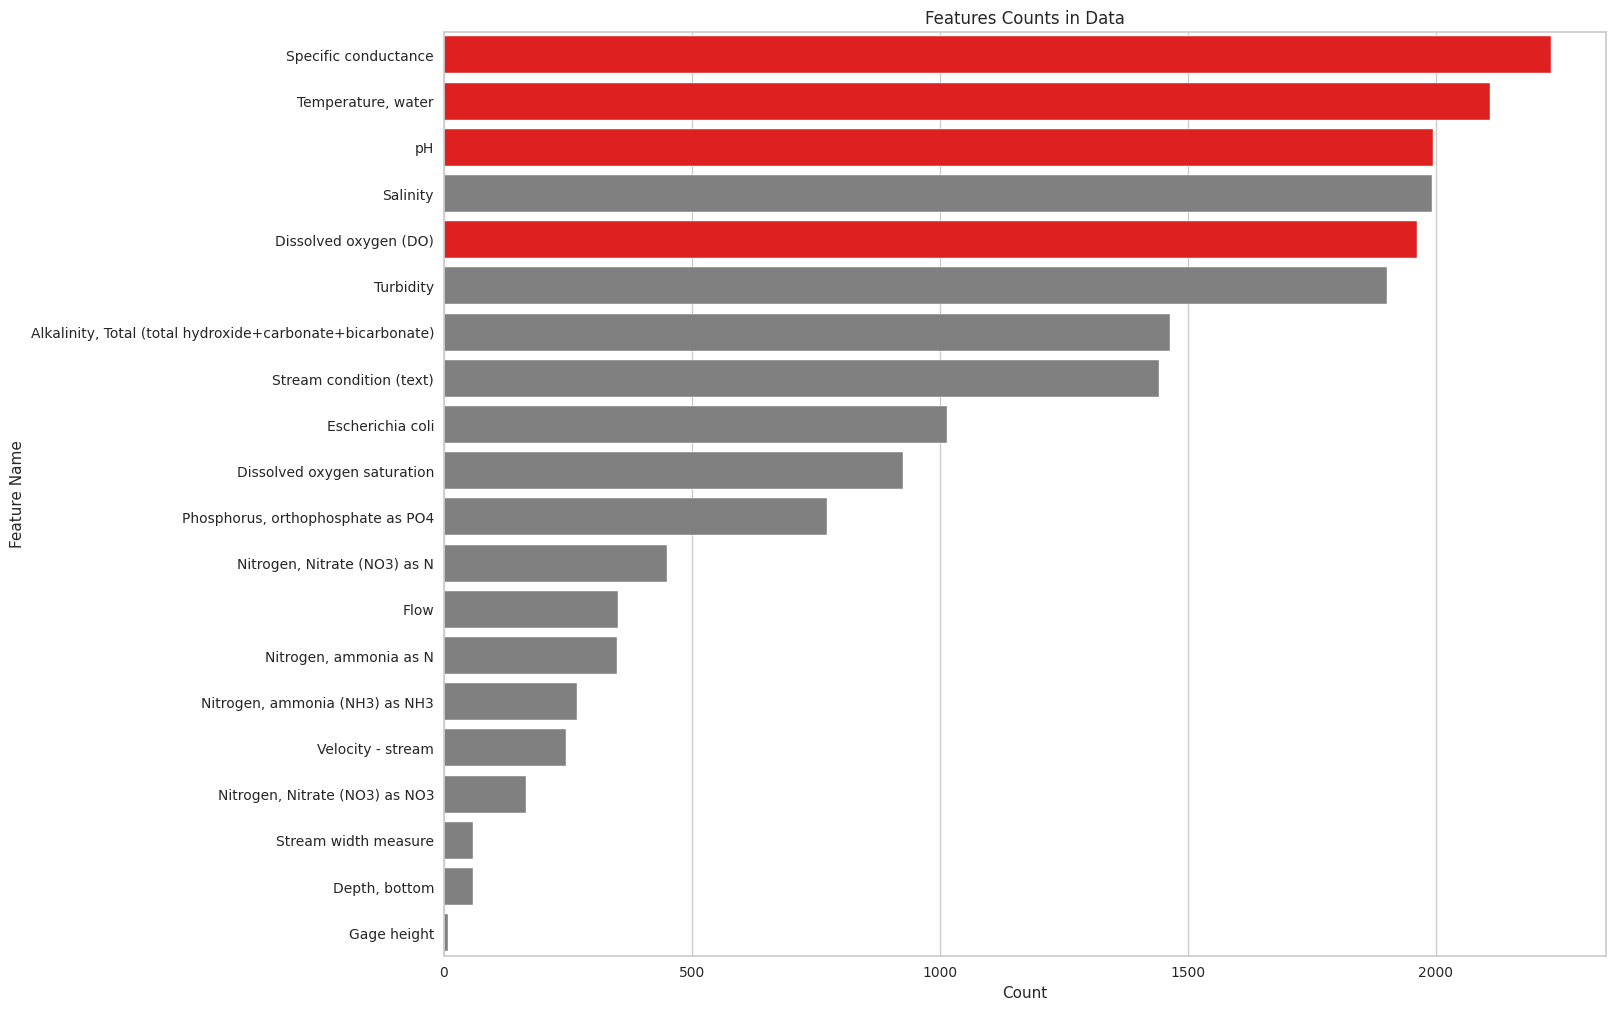

In [ ]:
X = df['Characteristic_Name'].value_counts()
plt.figure(figsize=(15,12))
ax = sns.barplot(X, orient="y", palette = col)
ax.set(ylabel="Feature Name", xlabel="Count", title="Features Counts in Data")
plt.show()

In [ ]:
df.head(20)

,Location_ID,Activity_Start_Date,Characteristic_Name,Result_Text
2,NIOB_NPS_AC137B,2023-05-12,Flow,4.93
3,NIOB_NPS_AC137B,2023-05-12,"Temperature, water",62.5
4,NIOB_NPS_AC137B,2023-05-12,Specific conductance,154.4
5,NIOB_NPS_AC137B,2023-05-12,Escherichia coli,2419.6
8,NIOB_NPS_AC137B,2023-06-02,Flow,2.39
9,NIOB_NPS_AC137B,2023-06-02,"Temperature, water",67.3
10,NIOB_NPS_AC137B,2023-06-02,pH,8.37
11,NIOB_NPS_AC137B,2023-06-02,Dissolved oxygen (DO),19.9
12,NIOB_NPS_AC137B,2023-06-02,Specific conductance,205
13,NIOB_NPS_AC137B,2023-06-02,Escherichia coli,3706.2


In [ ]:
new_df = pd.DataFrame({
        'Location': pd.Series(dtype='str'),
        'Date': pd.Series(dtype='str'),
        'pH' : pd.Series(dtype='float'),
        'temp' : pd.Series(dtype='float'),
        'DO' : pd.Series(dtype='float'),
        'conductance' : pd.Series(dtype='float'),
        #'salinity' : pd.Series(dtype="float")
})
for loc in np.unique(df.Location_ID):
    X = df[df.Location_ID == loc]
    for date in np.unique(X.Activity_Start_Date):
        tempdf = X[X.Activity_Start_Date == date]


        try:
            ph = tempdf[tempdf.Characteristic_Name=="pH"]["Result_Text"].iloc[0]
        except:
            ph = np.nan
        try:
            temp = tempdf[tempdf.Characteristic_Name=="Temperature, water"]["Result_Text"].iloc[0]
        except:
            temp = np.nan
        try:
            do = tempdf[tempdf.Characteristic_Name=="Dissolved oxygen (DO)"]["Result_Text"].iloc[0]
        except:
            do = np.nan
        try:
            cond = tempdf[tempdf.Characteristic_Name=="Specific conductance"]["Result_Text"].iloc[0]
        except:
            cond = np.nan
        try:
            sal = tempdf[tempdf.Characteristic_Name=="Salinity"]["Result_Text"].iloc[0]
        except:
            sal = np.nan


        row = pd.DataFrame({
        'Location': [loc],
        'Date': [date],
        'pH' : [ph],
        'temp' : [temp],
        'DO' : [do],
        'conductance' : [cond],
        #'salinity': [sal]
        })
        new_df = pd.concat([new_df, row], ignore_index=True)


In [ ]:
new_df = new_df.dropna()
new_df

,Location,Date,pH,temp,DO,conductance
1,NIOB_NPS_AC137B,2023-06-02,8.37,67.3,19.9,205
2,NIOB_NPS_AC137B,2023-07-07,8.17,64.3,5.51,170.1
3,NIOB_NPS_AC137B,2023-08-04,8.45,71.5,7.68,167.8
4,NIOB_NPS_AC137B,2023-09-11,8.46,60.3,8.95,195.7
5,NIOB_NPS_AC137B,2023-10-06,8.09,46.5,10.04,186.1
...,...,...,...,...,...,...
2108,NIOB_NPS_TYLECR,2004-06-21,8.4,17.2,7.03,172.8
2109,NIOB_NPS_TYLECR,2004-07-14,8.7,20.6,10.28,186.7
2110,NIOB_NPS_TYLECR,2004-08-06,8.4,18.8,8.45,180.5
2111,NIOB_NPS_TYLECR,2004-08-21,8.2,15.6,10.08,159.5


In [ ]:
new_df['Location'].value_counts()

Location
NIOB_NPS_NRBREB    220
NIOB_NPS_NRBERB    211
NIOB_NPS_NRCORB    176
NIOB_NPS_NRBORB    174
NIOB_NPS_NRNORB     85
                  ... 
NIOB_NPS_NRCUBC      1
NIOB_NPS_COLECR      1
NIOB_NPS_CHIMCR      1
NIOB_NPS_NRSNAK      1
NIOB_NPS_FAIRUP      1
Name: count, Length: 93, dtype: int64

In [ ]:
brewer_bridge = new_df[new_df.Location == "NIOB_NPS_NRBERB"].copy()
brewer_bridge.DO = brewer_bridge["DO"].astype(float)
brewer_bridge.temp = brewer_bridge["temp"].astype(float)
brewer_bridge = brewer_bridge[brewer_bridge.DO < 80]
brewer_bridge = brewer_bridge[brewer_bridge.temp < 50]
newdates = pd.to_datetime(brewer_bridge["Date"])
brewer_bridge["Date"] = newdates
brewer_bridge.sort_values(by='Date')

,Location,Date,pH,temp,DO,conductance
549,NIOB_NPS_NRBERB,2002-05-29,8.2,23.1,8.61,209.3
550,NIOB_NPS_NRBERB,2002-06-07,8.4,20.3,8.63,201.7
551,NIOB_NPS_NRBERB,2002-06-14,9.1,16.7,10.60,180
552,NIOB_NPS_NRBERB,2002-06-21,7.75,22.9,9.35,208
553,NIOB_NPS_NRBERB,2002-06-28,8.5,27.0,9.43,218.6
...,...,...,...,...,...,...
774,NIOB_NPS_NRBERB,2021-06-15,8.88,25.2,8.50,201
776,NIOB_NPS_NRBERB,2021-07-21,9.07,22.7,7.30,197
777,NIOB_NPS_NRBERB,2021-08-09,8.84,22.4,7.50,211
778,NIOB_NPS_NRBERB,2021-08-24,8.81,23.5,9.00,215


In [ ]:
brewdates = brewer_bridge.Date.copy()
brewdates = (brewdates - brewdates.min())  / np.timedelta64(1,'D')

In [ ]:
sns.set_palette("tab10")

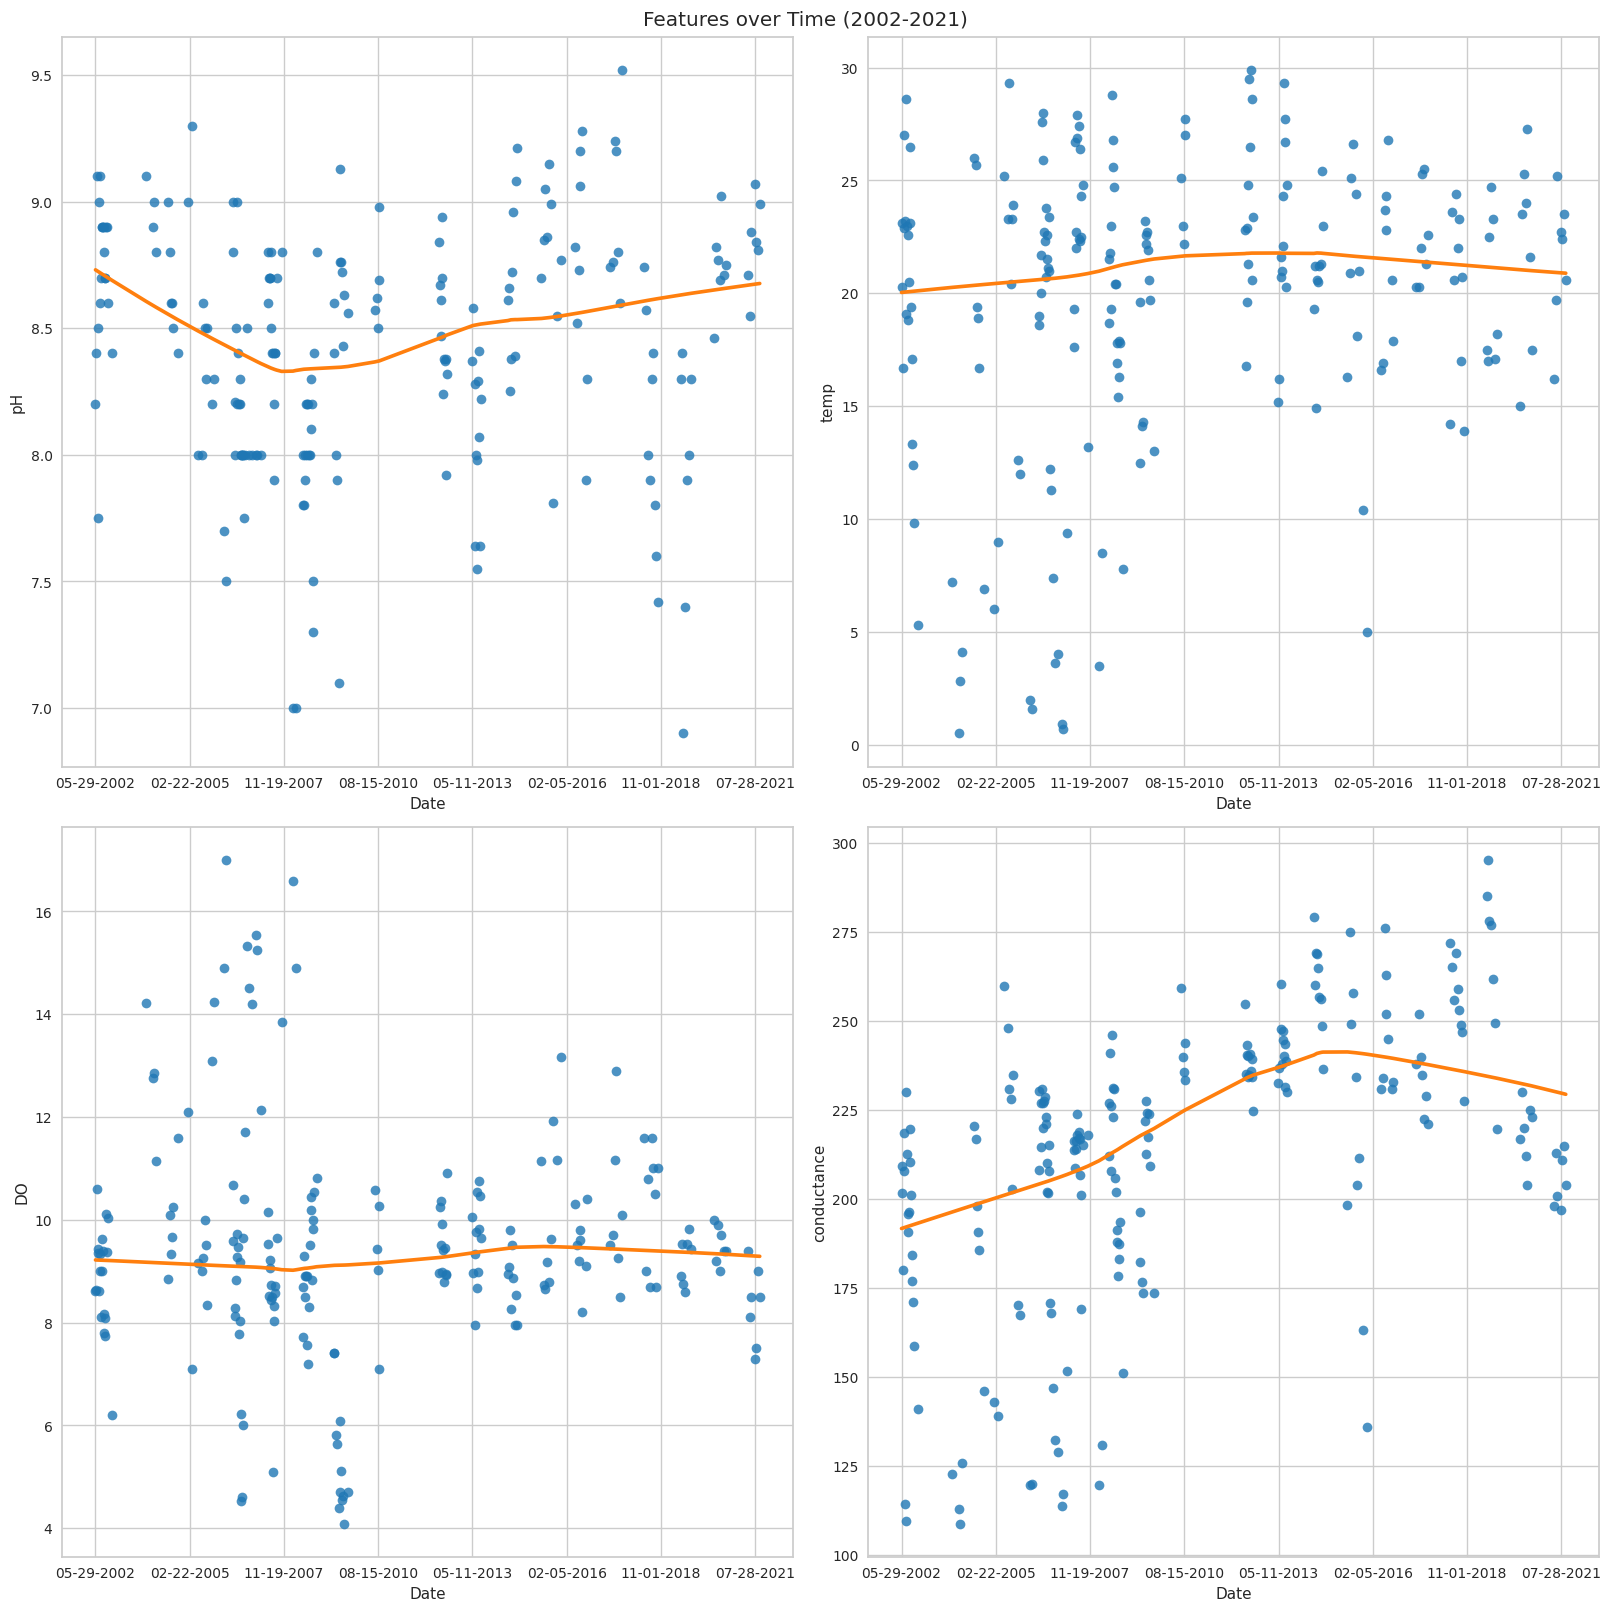

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16,16), layout="constrained")

X = brewdates

firstday = "05/29/02"
current_date_temp = datetime.datetime.strptime(firstday, "%m/%d/%y")


sns.regplot( ax = ax[0,0], lowess = True,
    x = X, y=brewer_bridge.pH.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[0,0].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[0,0].set_xticklabels(xticks_dates)


sns.regplot( ax = ax[0,1], lowess = True,
    x = X, y= brewer_bridge.temp.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[0,1].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[0,1].set_xticklabels(xticks_dates)


sns.regplot( ax = ax[1,0], lowess = True,
    x = X, y= brewer_bridge.DO.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[1,0].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[1,0].set_xticklabels(xticks_dates)


sns.regplot( ax = ax[1,1], lowess = True,
    x = X, y= brewer_bridge.conductance.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[1,1].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[1,1].set_xticklabels(xticks_dates)


fig.suptitle("Features over Time (2002-2021)")

plt.show()

In [ ]:
(X//365).value_counts()
#fourth year has most data points

Date
4.0     23
6.0     21
0.0     20
5.0     17
10.0    13
11.0    11
3.0     10
13.0    10
2.0      9
7.0      9
12.0     9
16.0     8
17.0     8
14.0     7
15.0     7
18.0     7
19.0     6
8.0      5
1.0      4
9.0      1
Name: count, dtype: int64

In [ ]:
oneyear = new_df[new_df.Location == "NIOB_NPS_NRBERB"].copy()
oneyear.DO = oneyear["DO"].astype(float)
oneyear = oneyear[oneyear.DO < 80]
newdates = pd.to_datetime(oneyear["Date"])
oneyear["Date"] = newdates
oneyear = oneyear[pd.DatetimeIndex(oneyear['Date']).year.isin([2006,2007,2008])]
oneyear.sort_values(by='Date')

,Location,Date,pH,temp,DO,conductance
593,NIOB_NPS_NRBERB,2006-02-23,7.7,2,14.90,119.7
594,NIOB_NPS_NRBERB,2006-03-16,7.5,1.6,17.00,120.1
595,NIOB_NPS_NRBERB,2006-05-22,9,19,9.58,208.3
596,NIOB_NPS_NRBERB,2006-06-01,8.8,18.6,10.67,230.4
597,NIOB_NPS_NRBERB,2006-06-15,8,21.7,8.29,214.6
...,...,...,...,...,...,...
651,NIOB_NPS_NRBERB,2008-09-10,8.2,15.4,8.82,178.5
652,NIOB_NPS_NRBERB,2008-09-17,7.5,16.3,10.00,183.3
653,NIOB_NPS_NRBERB,2008-09-22,7.3,17.9,9.82,187.5
654,NIOB_NPS_NRBERB,2008-09-29,8.4,17.8,10.54,193.5


In [ ]:
oneyeardates = oneyear.Date.copy()
oneyeardates = (oneyeardates - oneyeardates.min())  / np.timedelta64(1,'D')

In [ ]:
import datetime

In [ ]:
firstday = "02/23/06"
current_date_temp = datetime.datetime.strptime(firstday, "%m/%d/%y")

In [ ]:
current_date_temp

datetime.datetime(2006, 2, 23, 0, 0)

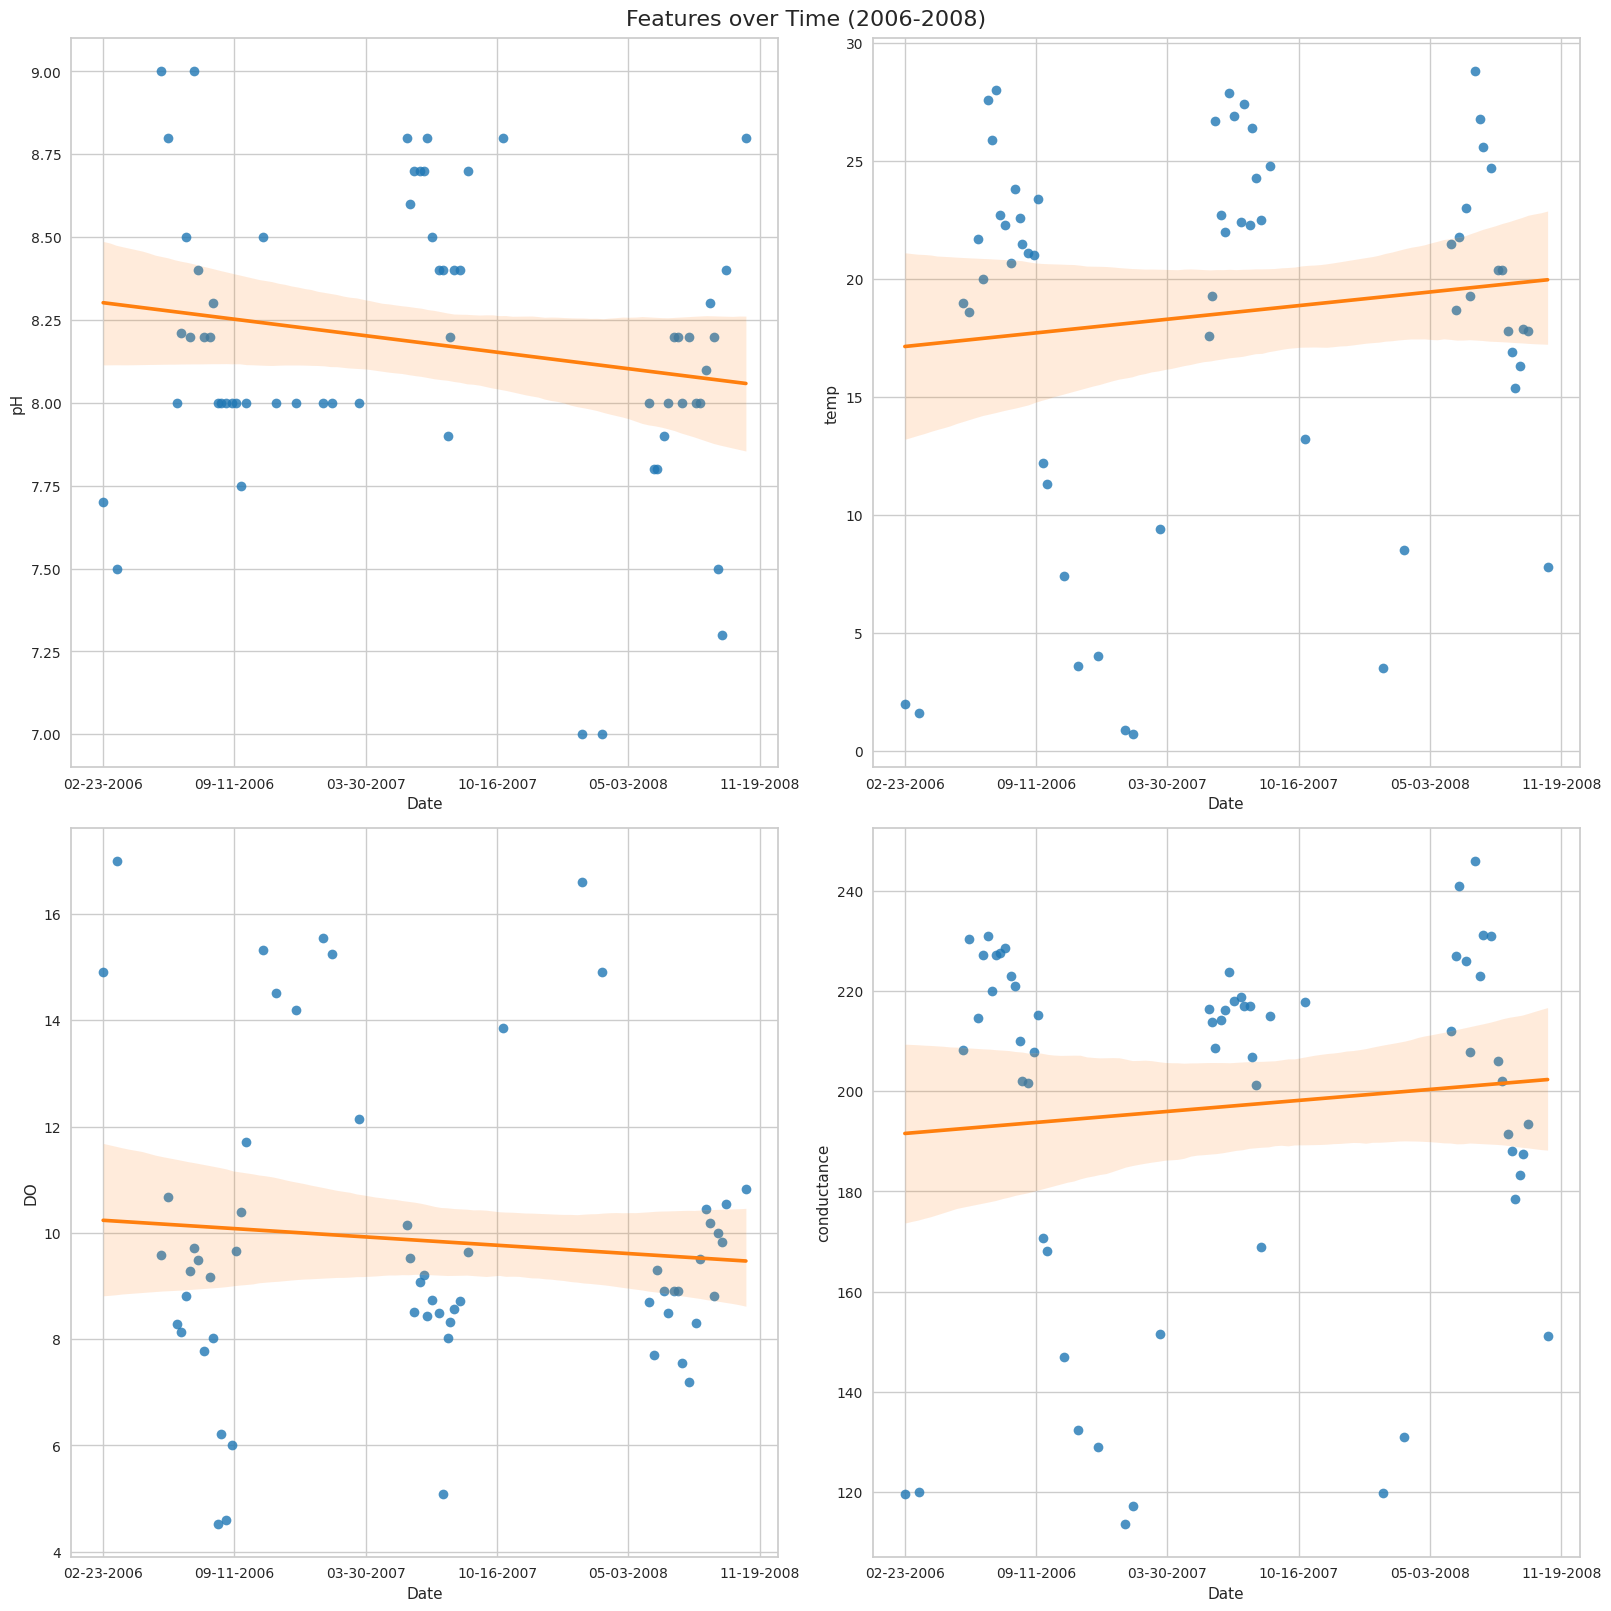

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (16,16), layout="constrained")

X = oneyeardates

firstday = "02/23/06"
current_date_temp = datetime.datetime.strptime(firstday, "%m/%d/%y")

sns.regplot(ax = ax[0,0], lowess = False,
    x = X, y=oneyear.pH.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[0,0].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[0,0].set_xticklabels(xticks_dates)



sns.regplot(ax = ax[0,1], lowess = False,
    x = X, y= oneyear.temp.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[0,1].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[0,1].set_xticklabels(xticks_dates)



sns.regplot(ax = ax[1,0], lowess = False,
    x = X, y= oneyear.DO.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[1,0].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[1,0].set_xticklabels(xticks_dates)




sns.regplot(ax = ax[1,1], lowess = False,
    x = X, y= oneyear.conductance.astype(float), line_kws={"color": "#FF7F0E"}
)
xticks = ax[1,1].get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax[1,1].set_xticklabels(xticks_dates)


fig.suptitle('Features over Time (2006-2008)', fontsize=16)
plt.show()

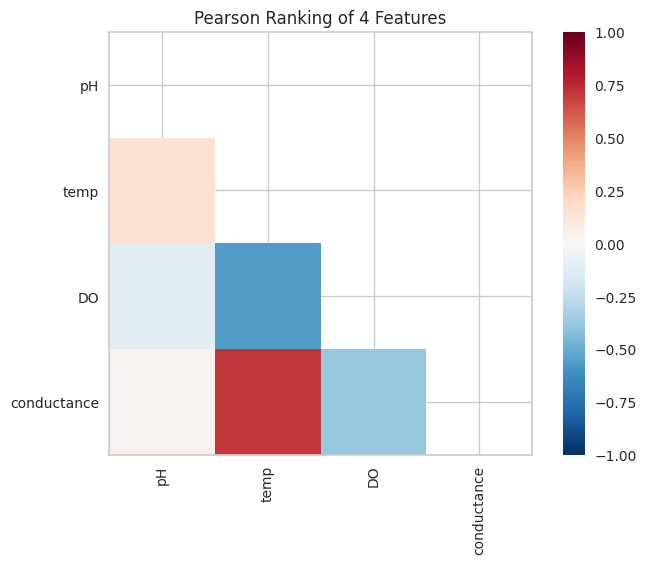

In [ ]:
from yellowbrick.features import rank2d

brew_X = brewer_bridge[["pH", "temp", "DO", "conductance"]]
brew_X = brew_X.astype(float)

rank2d(brew_X, show=False)
plt.show()

In [ ]:
# Not strong correlations
# If there were strong correlations, could just use PCA, but now we will try both MDS and PCA

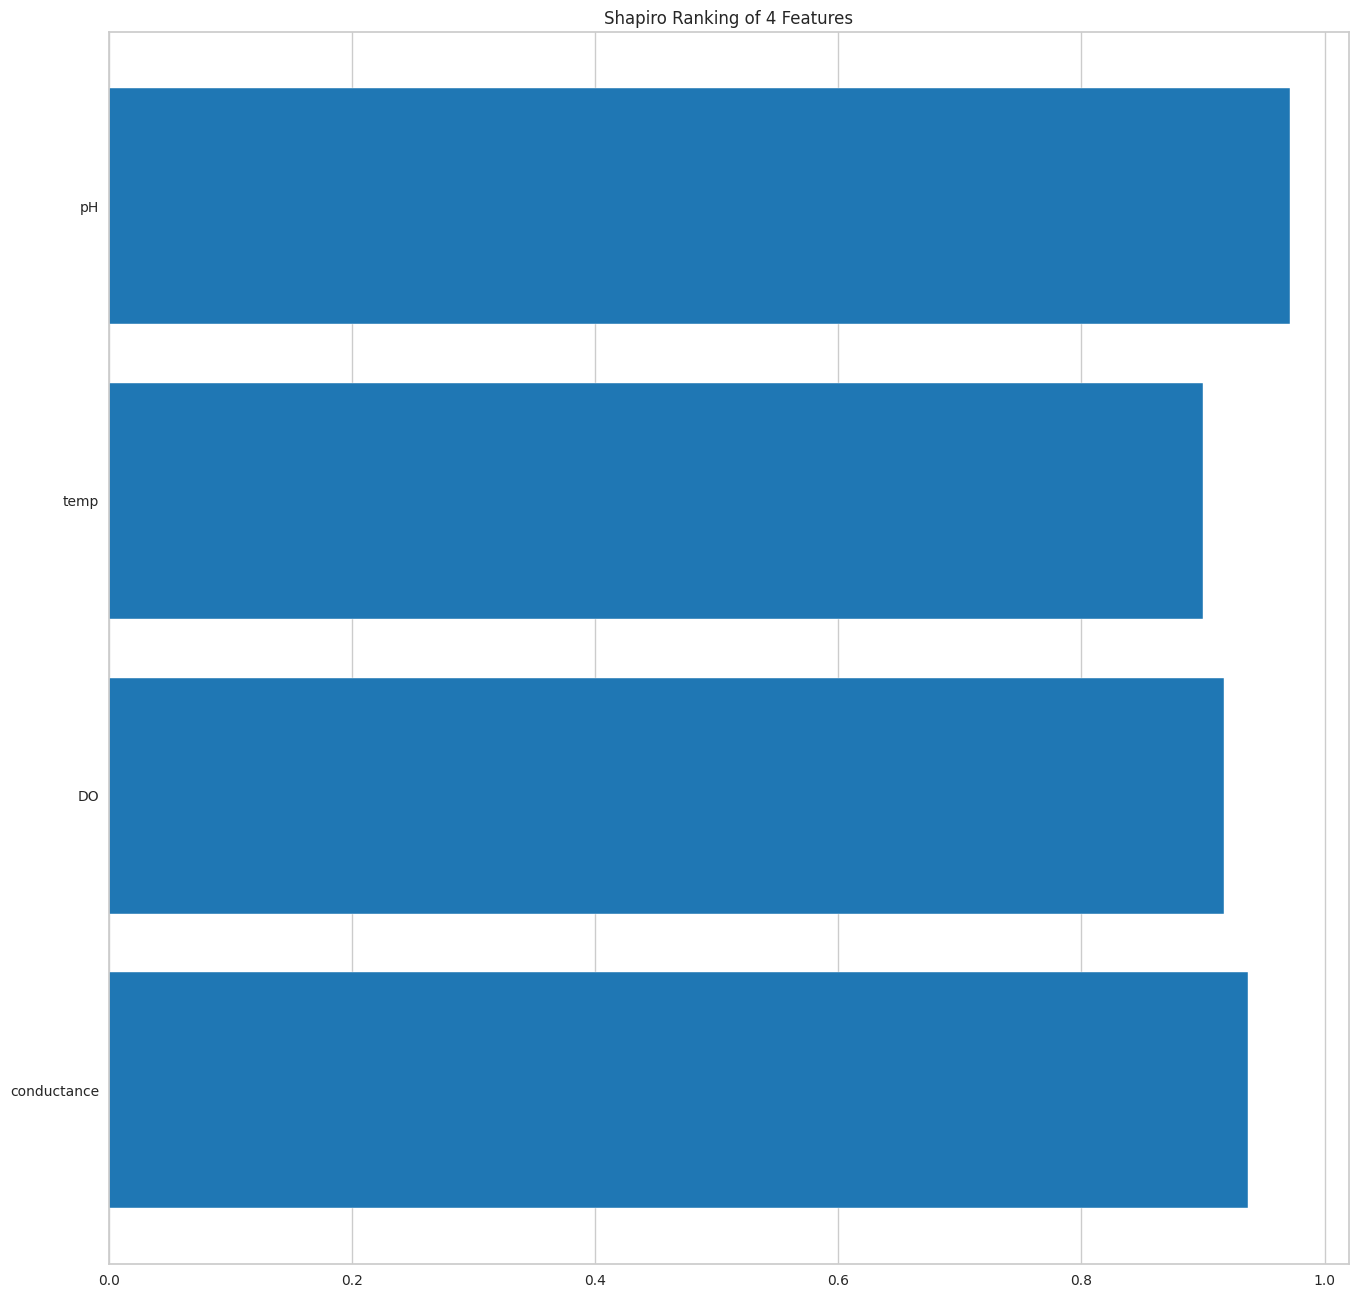

In [ ]:
from yellowbrick.features import rank1d
_, axes = plt.subplots(1,1, figsize=(16,16))
rank1d(brew_X, ax = axes, show=False)
plt.show()

In [ ]:
# MDS method
from sklearn.manifold import MDS

from sklearn.preprocessing import StandardScaler

brew_X_std = StandardScaler().fit_transform(brew_X)


mds = MDS(n_components=1, random_state = 42)
X_mds = mds.fit_transform(brew_X_std)

In [ ]:
import scipy

In [ ]:
r = scipy.stats.pearsonr(brewer_bridge.pH.to_numpy().astype(float), X_mds.astype(float).flatten())

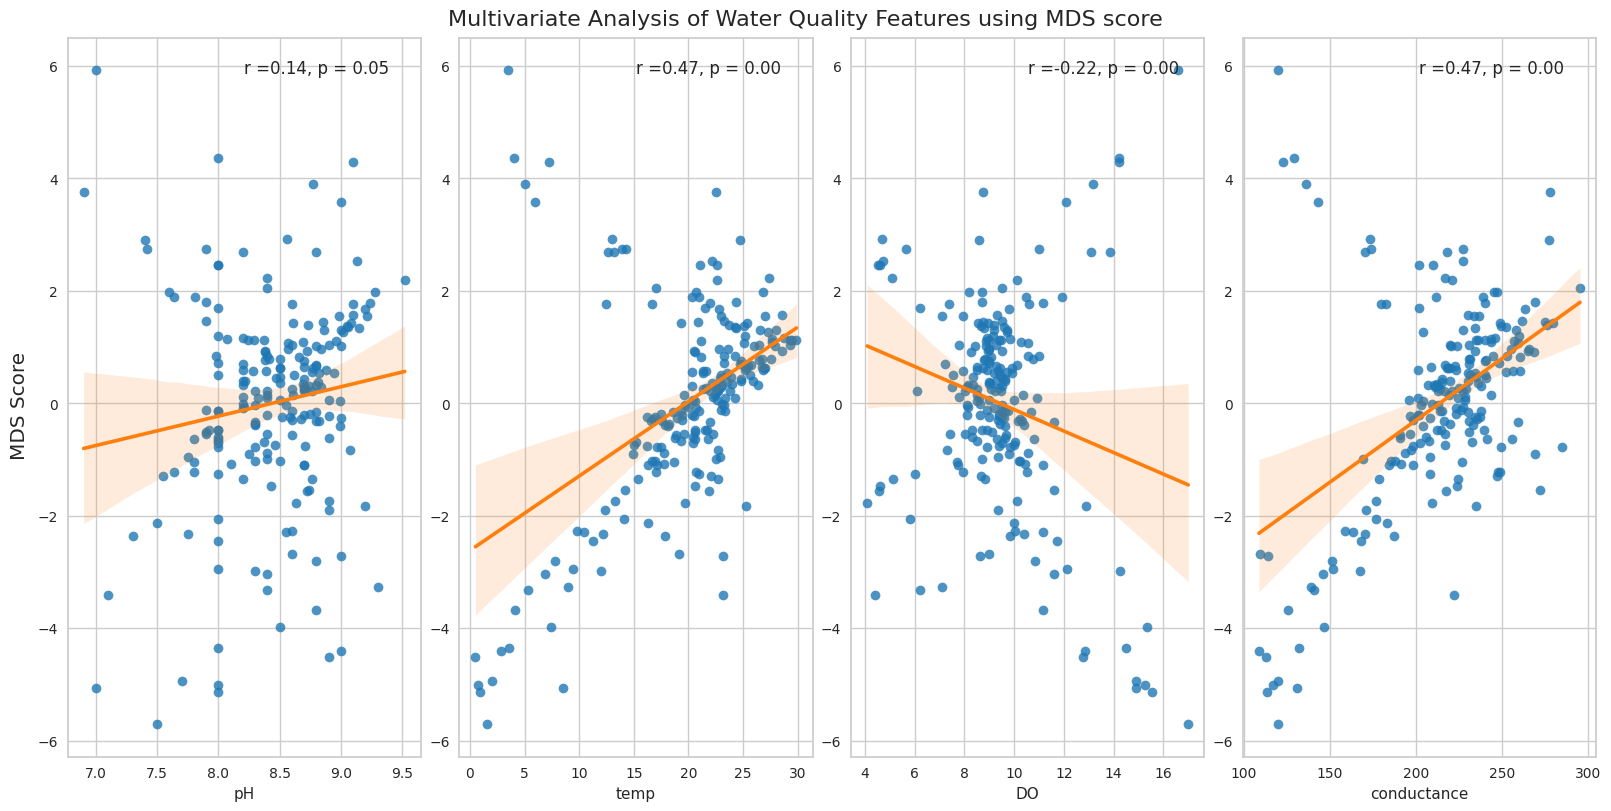

In [ ]:
# Multivariate analysis
fig, ax = plt.subplots(1, 4, figsize = (16,8), layout="constrained")




sns.regplot(ax = ax[0], lowess = False,
    x = brewer_bridge.pH.astype(float), y = X_mds, line_kws={"color": "#FF7F0E"}
)
r = scipy.stats.pearsonr(brewer_bridge.pH.to_numpy().astype(float), X_mds.astype(float).flatten())
tl = ((ax[0].get_xlim()[1] - ax[0].get_xlim()[0])*0.50 + ax[0].get_xlim()[0],
      (ax[0].get_ylim()[1] - ax[0].get_ylim()[0])*0.95 + ax[0].get_ylim()[0])
ax[0].text(tl[0], tl[1], f"r ={r[0]:.2f}, p = {r[1]:.2f}")




sns.regplot(ax = ax[1], lowess = False,
    x = brewer_bridge.temp.astype(float), y = X_mds, line_kws={"color": "#FF7F0E"}
)
r = scipy.stats.pearsonr(brewer_bridge.temp.to_numpy().astype(float), X_mds.astype(float).flatten())
tl = ((ax[1].get_xlim()[1] - ax[1].get_xlim()[0])*0.50 + ax[1].get_xlim()[0],
      (ax[1].get_ylim()[1] - ax[1].get_ylim()[0])*0.95 + ax[1].get_ylim()[0])
ax[1].text(tl[0], tl[1], f"r ={r[0]:.2f}, p = {r[1]:.2f}")


sns.regplot(ax = ax[2], lowess = False,
    x = brewer_bridge.DO.astype(float), y = X_mds, line_kws={"color": "#FF7F0E"}
)
r = scipy.stats.pearsonr(brewer_bridge.DO.to_numpy().astype(float), X_mds.astype(float).flatten())
tl = ((ax[2].get_xlim()[1] - ax[2].get_xlim()[0])*0.50 + ax[2].get_xlim()[0],
      (ax[2].get_ylim()[1] - ax[2].get_ylim()[0])*0.95 + ax[2].get_ylim()[0])
ax[2].text(tl[0], tl[1], f"r ={r[0]:.2f}, p = {r[1]:.2f}")




sns.regplot(ax = ax[3], lowess = False,
    x = brewer_bridge.conductance.astype(float), y = X_mds, line_kws={"color": "#FF7F0E"}
)
r = scipy.stats.pearsonr(brewer_bridge.conductance.to_numpy().astype(float), X_mds.astype(float).flatten())
tl = ((ax[3].get_xlim()[1] - ax[3].get_xlim()[0])*0.50 + ax[3].get_xlim()[0],
      (ax[3].get_ylim()[1] - ax[3].get_ylim()[0])*0.95 + ax[3].get_ylim()[0])
ax[3].text(tl[0], tl[1], f"r ={r[0]:.2f}, p = {r[1]:.2f}")




fig.suptitle('Multivariate Analysis of Water Quality Features using MDS score', fontsize=16)
fig.supylabel("MDS Score")
plt.show()

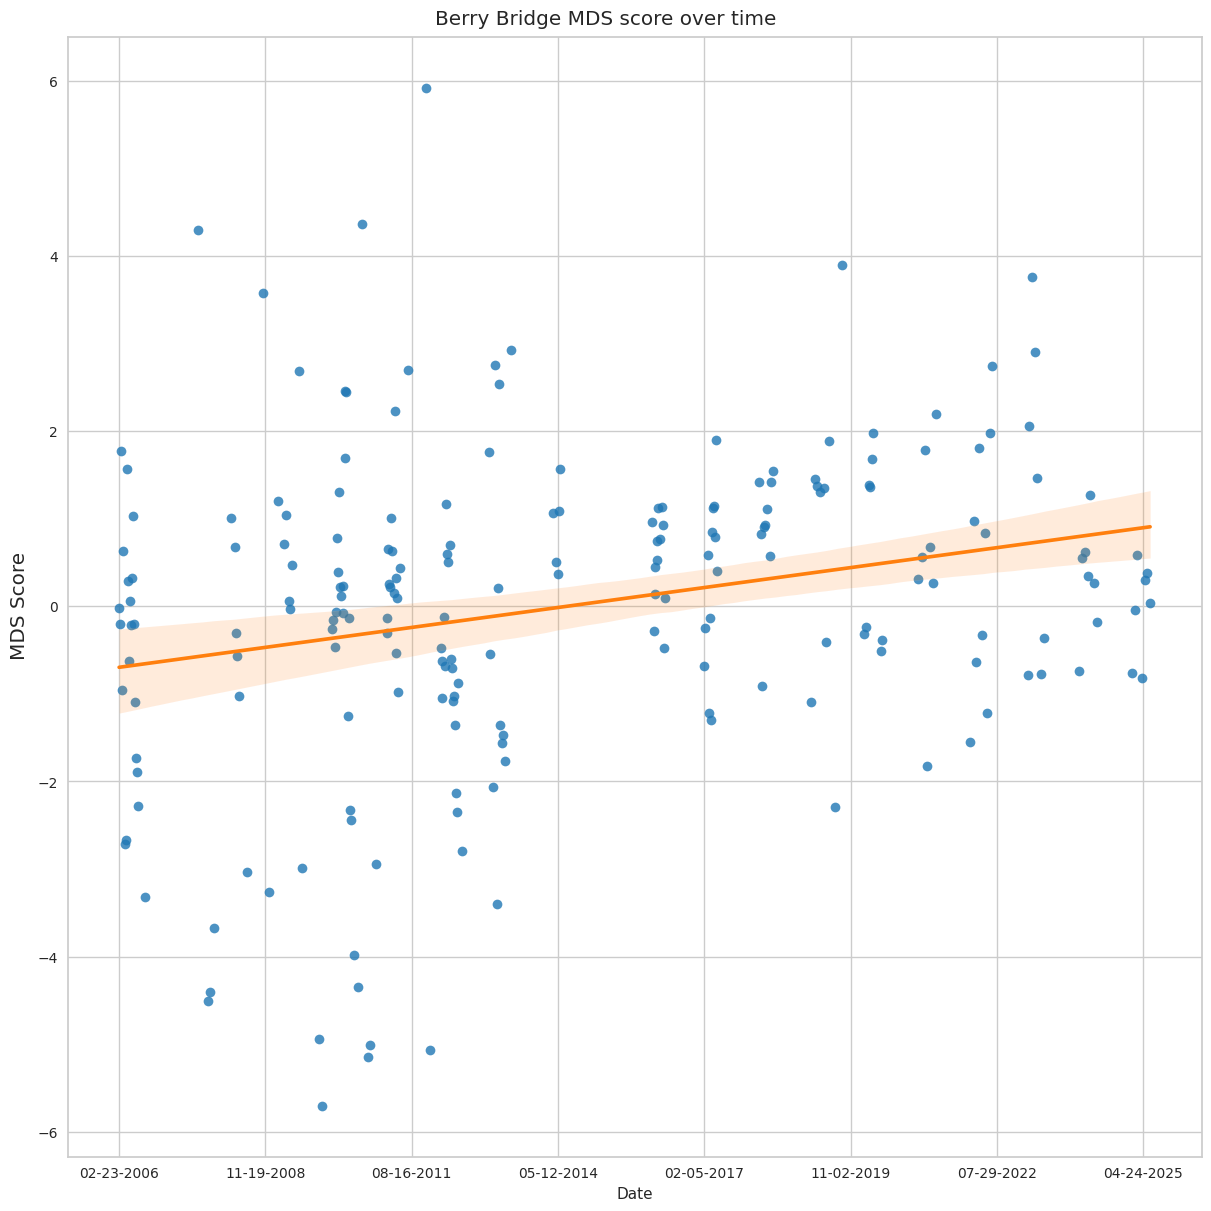

In [ ]:
# MDS showing our index increasing
fig, ax = plt.subplots(1, 1, figsize = (12,12), layout="constrained")
X = brewdates
sns.regplot(lowess = False, ax = ax,
    x = X, y=X_mds, line_kws={"color": "#FF7F0E"}
)
xticks = ax.get_xticks()
xticks_dates = [(current_date_temp + datetime.timedelta(days=x)).strftime('%m-%d-%Y') for x in xticks]
ax.set_xticklabels(xticks_dates)


fig.suptitle("Berry Bridge MDS score over time")
fig.supylabel("MDS Score")
plt.show()

In [ ]:
new_dates = pd.to_datetime(new_df["Date"])
new_df["Date"] = new_dates

In [ ]:
new_df

,Location,Date,pH,temp,DO,conductance
1,NIOB_NPS_AC137B,2023-06-02,8.37,67.3,19.9,205
2,NIOB_NPS_AC137B,2023-07-07,8.17,64.3,5.51,170.1
3,NIOB_NPS_AC137B,2023-08-04,8.45,71.5,7.68,167.8
4,NIOB_NPS_AC137B,2023-09-11,8.46,60.3,8.95,195.7
5,NIOB_NPS_AC137B,2023-10-06,8.09,46.5,10.04,186.1
...,...,...,...,...,...,...
2108,NIOB_NPS_TYLECR,2004-06-21,8.4,17.2,7.03,172.8
2109,NIOB_NPS_TYLECR,2004-07-14,8.7,20.6,10.28,186.7
2110,NIOB_NPS_TYLECR,2004-08-06,8.4,18.8,8.45,180.5
2111,NIOB_NPS_TYLECR,2004-08-21,8.2,15.6,10.08,159.5


In [ ]:
# Geospatial Representation:
from tqdm.notebook import tqdm

def get_MDS_value(location, date):
    # Creates a temporary dataframe using the location and locally computes MDS off of it
    # This way, the index is actually a measure of change locally
    # Returns the index score of the date selected
    temp_df = new_df[new_df.Location == location].copy()

    X = temp_df[["pH", "temp", "DO", "conductance"]].copy()
    X = X.astype(float)

    X_std = StandardScaler().fit_transform(X)

    mds = MDS(n_components=1, random_state = 42)
    X_mds = mds.fit_transform(X_std)

    temp_df["MDS"] = X_mds
    return temp_df[temp_df.Date == date]["MDS"].values[0]

def plot_final_graph(datebool, locations):
    # Plots the graph by calling the other functions
    # Locations is a list of locations to choose from (all of them)
    # Datebool is a True or False indicating whether to choose the most recent or oldest date

    # Create locations dataframe, will use to map
    cols = [
        "Location_ID", "Latitude", "Longitude", "Location_Name"
    ]
    locationdict = pd.read_csv("nioblocations.csv", usecols=cols)
    locationdict = locationdict[locationdict.Location_ID.isin(locations)]
    locationdict["MDS"] = np.nan


    # Iterate over all locations to create MDS for each location, return values into dataframe
    with tqdm(total=len(locations)) as pbar:
        for location in locations:
            if datebool:
                date = new_df[new_df.Location == location]["Date"].max()
                title = "Most Recent MDS data of the Niobara River"
            else:
                date = new_df[new_df.Location == location]["Date"].min()
                title = "Oldest MDS data of the Niobara River"

            MDS_val = get_MDS_value(location, date)

            locationdict.loc[locationdict.Location_ID == location, ["MDS"]] = MDS_val
            pbar.update(1)

    print(locationdict)
    return locationdict

In [ ]:
locations_list = np.unique(new_df['Location'])
locationdictbefore = plot_final_graph(datebool = 0, locations = locations_list)

  0%|          | 0/93 [00:00<?, ?it/s]

        Location_ID                     Location_Name   Latitude   Longitude  \
0   NIOB_NPS_AC137B  Anne Creek at Highway 137 Bridge  42.781636  -99.334992   
1   NIOB_NPS_BACKCR             Backwater Creek Mouth  42.814092 -100.138610   
2   NIOB_NPS_BBEACR            Big Beaver Creek Mouth  42.905300 -100.420515   
3   NIOB_NPS_BCEDCR             Big Cedar Creek Mouth  42.868438 -100.259865   
4   NIOB_NPS_BERRCR                       Berry Falls  42.901659 -100.361963   
..              ...                               ...        ...         ...   
93  NIOB_NPS_SLIDCR                 Slide Creek Mouth  42.850424 -100.215767   
94  NIOB_NPS_SMITCR        Smith Falls at Creek Mouth  42.889993 -100.315377   
95  NIOB_NPS_SPLICR                       Split Falls  42.827564 -100.161845   
96  NIOB_NPS_STAICR    Stairstep Falls at Creek Mouth  42.852006 -100.217147   
97  NIOB_NPS_TYLECR        Tyler Falls at Creek Mouth  42.905381 -100.424631   

         MDS  
0  -2.807457  
1   0.107

In [ ]:
locationdictafter = plot_final_graph(datebool = 1, locations = locations_list)

  0%|          | 0/93 [00:00<?, ?it/s]

        Location_ID                     Location_Name   Latitude   Longitude  \
0   NIOB_NPS_AC137B  Anne Creek at Highway 137 Bridge  42.781636  -99.334992   
1   NIOB_NPS_BACKCR             Backwater Creek Mouth  42.814092 -100.138610   
2   NIOB_NPS_BBEACR            Big Beaver Creek Mouth  42.905300 -100.420515   
3   NIOB_NPS_BCEDCR             Big Cedar Creek Mouth  42.868438 -100.259865   
4   NIOB_NPS_BERRCR                       Berry Falls  42.901659 -100.361963   
..              ...                               ...        ...         ...   
93  NIOB_NPS_SLIDCR                 Slide Creek Mouth  42.850424 -100.215767   
94  NIOB_NPS_SMITCR        Smith Falls at Creek Mouth  42.889993 -100.315377   
95  NIOB_NPS_SPLICR                       Split Falls  42.827564 -100.161845   
96  NIOB_NPS_STAICR    Stairstep Falls at Creek Mouth  42.852006 -100.217147   
97  NIOB_NPS_TYLECR        Tyler Falls at Creek Mouth  42.905381 -100.424631   

         MDS  
0  -1.147169  
1  -3.066

In [ ]:
locationdictbefore

,Location_ID,Location_Name,Latitude,Longitude,MDS
0,NIOB_NPS_AC137B,Anne Creek at Highway 137 Bridge,42.781636,-99.334992,-2.807457
1,NIOB_NPS_BACKCR,Backwater Creek Mouth,42.814092,-100.138610,0.107558
2,NIOB_NPS_BBEACR,Big Beaver Creek Mouth,42.905300,-100.420515,0.780020
3,NIOB_NPS_BCEDCR,Big Cedar Creek Mouth,42.868438,-100.259865,-0.171257
4,NIOB_NPS_BERRCR,Berry Falls,42.901659,-100.361963,-0.094283
...,...,...,...,...,...
93,NIOB_NPS_SLIDCR,Slide Creek Mouth,42.850424,-100.215767,-2.000000
94,NIOB_NPS_SMITCR,Smith Falls at Creek Mouth,42.889993,-100.315377,-0.320764
95,NIOB_NPS_SPLICR,Split Falls,42.827564,-100.161845,-0.792838
96,NIOB_NPS_STAICR,Stairstep Falls at Creek Mouth,42.852006,-100.217147,3.870604


In [ ]:
locationdictbefore = locationdictbefore.reset_index(drop=True)
locationdictafter = locationdictafter.reset_index(drop=True)

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure()



px.set_mapbox_access_token(open(".mapbox_token").read())


fig.add_trace(px.scatter_mapbox(locationdictbefore,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location_Name",
                        hover_data=["Location_Name", "MDS"],
                        color="MDS",
                        color_continuous_scale="balance",#color_scale,
                        zoom=8,
                        height=1200,
                        width=1200).data[0])

fig.add_trace(px.scatter_mapbox(locationdictafter,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location_Name",
                        hover_data=["Location_Name", "MDS"],
                        color="MDS",
                        color_continuous_scale="balance",#color_scale,
                        zoom=8,
                        height=1200,
                        width=1200).data[0])



fig.update_layout(mapbox_style="light")
fig.update_traces(hovertemplate="Location Name:  %{customdata[0]} <br> MDS Index: %{customdata[1]}")
fig.update_traces(marker={
    "size" : 12,
    "opacity" : 1.0,
})



fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(locationdictbefore,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location_Name",
                        hover_data=["Location_Name", "MDS"],
                        color="MDS",
                        color_continuous_scale="balance",
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="light")
fig.update_traces(hovertemplate="Location Name:  %{customdata[0]} <br> MDS Index: %{customdata[1]}")
fig.update_traces(marker={
    "size" : 12,
    "opacity" : 1.0,
})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(locationdictafter,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location_Name",
                        hover_data=["Location_Name", "MDS"],
                        color="MDS",
                        color_continuous_scale="balance",#color_scale,
                        zoom=8,
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="light")
fig.update_traces(hovertemplate="Location Name:  %{customdata[0]} <br> MDS Index: %{customdata[1]}")
fig.update_traces(marker={
    "size" : 12,
    "opacity" : 1.0,
})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
textbefore = []
for i in range(len(locationdictbefore)):
    loc_ = locationdictbefore["Location_Name"][i]
    mds_ = locationdictbefore["MDS"][i]
    textbefore.append(f"{loc_} MDS: {mds_}")

textafter = []
for i in range(len(locationdictafter)):
    loc_ = locationdictafter["Location_Name"][i]
    mds_ = locationdictafter["MDS"][i]
    textafter.append(f"{loc_} MDS: {mds_}")

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

mapbox_access_token = open(".mapbox_token").read()



In [ ]:
np.mean(locationdictbefore["MDS"])

-0.19145827349230252

In [ ]:
np.mean(locationdictafter["MDS"])

0.05413171330434482

In [ ]:
locationdictafter = locationdictafter.rename(columns={'MDS': 'aftermds'})
locationdictafter

,Location_ID,Location_Name,Latitude,Longitude,aftermds
0,NIOB_NPS_AC137B,Anne Creek at Highway 137 Bridge,42.781636,-99.334992,-1.147169
1,NIOB_NPS_BACKCR,Backwater Creek Mouth,42.814092,-100.138610,-3.066172
2,NIOB_NPS_BBEACR,Big Beaver Creek Mouth,42.905300,-100.420515,2.533979
3,NIOB_NPS_BCEDCR,Big Cedar Creek Mouth,42.868438,-100.259865,-1.345119
4,NIOB_NPS_BERRCR,Berry Falls,42.901659,-100.361963,-0.793983
...,...,...,...,...,...
88,NIOB_NPS_SLIDCR,Slide Creek Mouth,42.850424,-100.215767,2.000000
89,NIOB_NPS_SMITCR,Smith Falls at Creek Mouth,42.889993,-100.315377,-1.829183
90,NIOB_NPS_SPLICR,Split Falls,42.827564,-100.161845,3.407984
91,NIOB_NPS_STAICR,Stairstep Falls at Creek Mouth,42.852006,-100.217147,-2.207109


In [ ]:
delta = pd.merge(locationdictbefore, locationdictafter, how="left", on=["Location_ID", 'Location_Name',	"Latitude",	"Longitude"])

In [ ]:
delta["Delta MDS"] = delta["aftermds"] - delta["MDS"]

In [ ]:
delta

,Location_ID,Location_Name,Latitude,Longitude,MDS,aftermds,Delta MDS
0,NIOB_NPS_AC137B,Anne Creek at Highway 137 Bridge,42.781636,-99.334992,-2.807457,-1.147169,1.660288
1,NIOB_NPS_BACKCR,Backwater Creek Mouth,42.814092,-100.138610,0.107558,-3.066172,-3.173730
2,NIOB_NPS_BBEACR,Big Beaver Creek Mouth,42.905300,-100.420515,0.780020,2.533979,1.753959
3,NIOB_NPS_BCEDCR,Big Cedar Creek Mouth,42.868438,-100.259865,-0.171257,-1.345119,-1.173862
4,NIOB_NPS_BERRCR,Berry Falls,42.901659,-100.361963,-0.094283,-0.793983,-0.699701
...,...,...,...,...,...,...,...
88,NIOB_NPS_SLIDCR,Slide Creek Mouth,42.850424,-100.215767,-2.000000,2.000000,4.000000
89,NIOB_NPS_SMITCR,Smith Falls at Creek Mouth,42.889993,-100.315377,-0.320764,-1.829183,-1.508419
90,NIOB_NPS_SPLICR,Split Falls,42.827564,-100.161845,-0.792838,3.407984,4.200822
91,NIOB_NPS_STAICR,Stairstep Falls at Creek Mouth,42.852006,-100.217147,3.870604,-2.207109,-6.077713


In [147]:
delta.to_csv('finaldata.csv')

In [153]:
from google.colab import files
files.download('finaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(delta,
                        title = "Niobrara River Water Quality Change from 2002-2023 <br>Higher MDS Value means worse water quality",
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location_Name",
                        hover_data=["Location_Name", "MDS", "aftermds", "Delta MDS"],
                        color="Delta MDS",
                        color_continuous_scale="balance",#color_scale,
                        zoom=10,
                        height=900,
                        width=1200)

fig.update_layout(mapbox_style="mapbox://styles/sumanthkolli03/clvvnux5b06ah01pe8uxc8xpa/draft", title_x=0.5, title_y=0.95)
fig.update_traces(hovertemplate="Location Name:  %{customdata[0]} <br> Earliest MDS Score: %{customdata[1]:.2f} <br> Latest MDS Score: %{customdata[2]:.2f} <br> MDS Delta: %{customdata[3]:.2f}")
fig.update_traces(marker={
    "size" : 12,
    "opacity" : 1.0,
})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()